<span style="font-size: 14pt">ФИВТ, АПТ, Курс по машинному обучению, Весна 2017, семинар 13 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko, </span>
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

# Методы сжатие размерности
<h3> Plan </h3>

* ** Напоминание лекции ** 
 - Пространство признаков: основные проблемы при большиз d
 - Мультиколлинеарность


* **PCA, SVD**
 - Разложение матриц: SVD и PCA
 - Применение PCA для регрессии
 - Применение PCA для задачи классификации
  
* **tSNE**
 - Идея tSNE
 - tSNE для MNIST

In [35]:
import os
import time
import warnings
import datetime
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, LSHForest

import seaborn as sns
# import cPickle as pickle
import pylab

from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

%matplotlib inline
sns.set_context("notebook", font_scale=1.5)
import random
from IPython.display import Image, SVG
from scipy import optimize

<h1 align="center"> Напоминание с лекции </h1>
** Вопросы **
* Что такое обучение без учителя?
* Какие проблемы возникают при обучении алгоритмов из-за большой размерности пространства признаков?
* Что такое проблема мультиколлинеарности?
* Какие пути решения проблемы мультиколлинеарности вы знаете?

### Мультиколлинеарность

## $$ g(x, \alpha) = \sum_{i}^{n} \alpha_i f_i(x) $$
## $$ Q(\alpha) = \| F\alpha - y \|^2 $$

Solution

## $$ \alpha^{*} = (F^{T}F)^{-1}F^{T}y = F^{+}y $$
## $$ Q(\alpha^{*}) = \| P_{F}y - y \|^2 $$
## $$ P_{F} = FF^{+} $$

See <a href='http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf'> К.В. Воронцов, Методы машинного обучения по прецедентам </a>
* глава 5.3 Линейная регрессия

### Пример мультиколлинеарности

In [1]:
from numpy.linalg import inv, norm, eigvals, svd
from scipy import diag
from scipy.optimize import fmin
from sklearn.datasets import make_regression

In [71]:
### Linear Regression
d = 100
X, Y = make_regression(n_samples=200, n_features=d, effective_rank=1, noise=0)

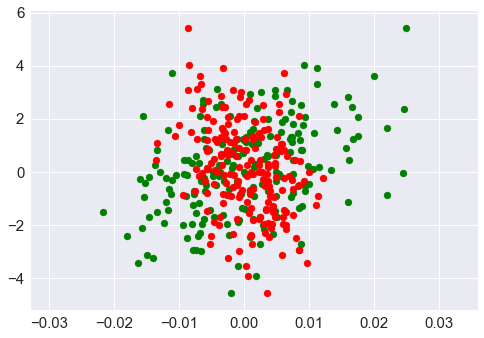

In [66]:
pylab.scatter(X[:, 0], Y, c="green")
pylab.scatter(X[:, 1], Y, c="red")

In [67]:
F_plus = np.dot(inv(np.dot(X.T, X)), X.T)
alpha = np.dot(F_plus, Y)
print "Alpha:", alpha
print "Q:", norm(np.dot(X, alpha) - Y)

Alpha: [  1.73373337e-06   7.70298357e-07   8.44449050e-06   3.48893868e+01
  -1.64633093e-06  -1.00553734e-07   2.17391062e-07  -1.13412625e-06
   4.14646638e-06   1.96107703e-06   1.86119087e-06  -4.72918691e-06
  -2.94921483e-06   1.76507638e-06  -6.84213319e-07   4.35279617e-06
   5.18827661e+01   7.07475920e-07  -5.39512257e-09  -1.82995700e-06
   9.83846803e-07  -8.05464879e-07   1.42313002e-06  -5.75926606e-07
  -6.85589839e-07   1.14025352e-06   1.23528918e+01  -1.51470704e-06
   3.80559868e-08   1.24383359e-06  -7.72772182e-07   2.53258349e-07
   6.77196296e+01   8.78127139e-07   5.22438313e-07  -1.42289446e-06
  -1.35416485e-07   4.27637133e-07   2.10773123e-07  -2.19910362e-07
   6.85385844e+01   1.39977692e-06  -1.06035623e-06   9.24933813e+01
   1.25277437e+01   8.48178503e+01   8.12119442e+01  -4.83818440e-07
   3.69938789e-07  -2.37276254e-07  -6.67569111e-08  -3.15452780e-07
   6.08998562e-07   2.50470293e-07   9.54087227e-08   4.51898813e-07
  -5.63168214e-07   2.74339

### Problem: Condition Number

In [69]:
eigen_values = eigvals(np.dot(X.T, X))
# print eigen_values

print  ('cond_number:', eigen_values.max() / eigen_values.min())

('cond_number:', 1588878631.8765581)


**Замечание:** Число обусловленности матрицы не должно превышать 10^2

---------
<h1 align="center"> PCA, SVD 

## SVD, PCA

#### PCA

## $$ \| G U^{T} - F \|^2 \to \min_{G, U} $$

$$ dim U = (\ell \times n),~~~ dim G = (\ell \times m),~~~ dim U = (n\times m) $$ 

#### SVD

## $$ F = V D U^{T} $$

## $$ F^{+} = U D^{-1} V^{T} $$

## $$ F = G U^{T} = V D U^{T} $$

Student Question: singular values vs explained variance?

In [74]:
# U --> already transposed (U^T)
V, D, U = svd(X, full_matrices=False)

#### Compare eigen values

In [75]:
print X.shape, V.shape, D.shape, U.shape
print norm(np.dot(np.dot(V, diag(D)), U) - X)
print "eigen values:", np.diagonal(np.dot(diag(D), diag(D)))
print "difference:", np.diagonal(np.dot(diag(D), diag(D))) - eigen_values[list(reversed(list(eigen_values.argsort())))]

(200L, 100L) (200L, 100L) (100L,) (100L, 100L)
1.18045750965e-14
eigen values: [  1.00000000e+00   4.04952051e-01   1.75161666e-01   1.37248625e-01
   1.12332279e-01   9.19698603e-02   7.52985530e-02   6.16492410e-02
   5.04741295e-02   4.13247221e-02   3.38338208e-02   2.77007896e-02
   2.26794883e-02   1.85683946e-02   1.52025157e-02   1.24467671e-02
   1.01905510e-02   8.34331749e-03   6.83093061e-03   5.59269296e-03
   4.57890972e-03   3.74889421e-03   3.06933498e-03   2.51295894e-03
   2.05743676e-03   1.68448675e-03   1.37914111e-03   1.12914524e-03
   9.24465929e-04   7.56888686e-04   6.19688044e-04   5.07357659e-04
   4.15389318e-04   3.40092009e-04   2.78443787e-04   2.27970491e-04
   1.86646452e-04   1.52813190e-04   1.25112858e-04   1.02433745e-04
   8.38656570e-05   6.86633925e-05   5.62168310e-05   4.60264484e-05
   3.76832688e-05   3.08524510e-05   2.52598505e-05   2.06810164e-05
   1.69321841e-05   1.38628999e-05   1.13499824e-05   9.29257967e-06
   7.60812075e-06   6.22

#### Linear Regression Solution over SVD decomposition

In [76]:
V, D, U = svd(X, full_matrices=False)
D_inv = diag(1 / D)
D = diag(D)

F_svd_plus = np.dot(U.T, np.dot(D_inv, V.T))
alpha_svd = np.dot(F_svd_plus, Y)
print alpha_svd
print norm(np.dot(X, alpha_svd) - Y)

[ -1.00044417e-11  -1.27329258e-11  -8.18545232e-12   3.63797881e-12
  -1.47792889e-11  -1.63709046e-11  -1.18234311e-11  -9.32232069e-12
  -2.27373675e-12  -1.81898940e-12   7.40578573e+01  -1.09139364e-11
  -5.45696821e-12   5.62519371e+01   6.36646291e-12  -9.09494702e-12
  -1.27329258e-11   5.91171556e-12   0.00000000e+00  -9.09494702e-12
   2.00088834e-11  -5.45696821e-12  -4.54747351e-13   2.09183781e-11
   8.72593653e+01  -1.63709046e-11   0.00000000e+00   7.15218135e+01
   0.00000000e+00  -1.09139364e-11  -4.54747351e-12  -9.09494702e-13
   2.36468622e-11  -1.81898940e-11   1.22781785e-11   0.00000000e+00
   1.00044417e-11  -3.81987775e-11  -1.81898940e-11   4.77318939e+01
  -9.09494702e-13   1.50066626e-11  -3.63797881e-12   9.38939306e+01
   3.83611924e+01  -7.27595761e-12  -3.63797881e-12  -3.18323146e-12
   2.72848411e-12   0.00000000e+00   6.04299650e+01   8.18545232e-12
  -5.68434189e-12  -1.09139364e-11   4.54747351e-12   2.45563569e-11
   5.45696821e-12   5.45696821e-12

#### Truncated SVD

In [77]:
V, D, U = svd(X, full_matrices=False)
D_inv = diag([(1 / D)[0], 0.0])
D = diag([D[0], 0.0])

print "Truncated D:"
print D
print

print "SVD approximation norm:", norm(np.dot(np.dot(V, D), U) - X)

F_svd_plus = np.dot(U.T, np.dot(D_inv, V.T))
alpha_svd = np.dot(F_svd_plus, Y)
print alpha_svd
print norm(np.dot(X, alpha_svd) - Y)

Truncated D:
[[ 1.  0.]
 [ 0.  0.]]

SVD approximation norm:

ValueError: shapes (200,100) and (2,2) not aligned: 100 (dim 1) != 2 (dim 0)

## PCA for Classifiaction (TBD)

In [19]:
from sklearn.svm import SVC
from sklearn.cross_validation import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

C:\Users\rusrom\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
cv_strategy = ShuffleSplit(iris.data.shape[0], random_state=33, n_iter=150, test_size=0.2)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=2)),
    ('svm', SVC(kernel="linear")),
])
print "SVM:", cross_val_score(SVC(kernel="linear"), iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean()
print "PCA+SVM:", cross_val_score(estimator, iris.data, iris.target, scoring='accuracy', cv=cv_strategy).mean()

SVM: 0.977555555556
PCA+SVM: 0.960444444444


In [21]:
from sklearn.datasets import load_digits

digits = load_digits()

cv_strategy = ShuffleSplit(digits.data.shape[0], random_state=33, n_iter=9, test_size=0.2)

estimator = Pipeline([
    ('reduce_dim', PCA(n_components=40)),
    ('svm', SVC(kernel="linear")),
])

for estimator_ in [SVC(kernel="linear"), estimator]:
    scoring = cross_val_score(estimator_, digits.data, digits.target, scoring='accuracy', cv=cv_strategy)
    print scoring.mean(), scoring.std()

0.972839506173 0.00960268468278
0.973456790123 0.00898778998677


-------
<h1 align="center">tSNE</h1> 
## Идея tSNE
Laurens, Hinton Visualizing Data using t-SNE, 2008

** Вопросы:**
- В чём основаная идея SNE? 
- Какие преимущества tSNE переж SNE?

** tSNE превносит дополнительную интепретацию в данные!!! **
http://distill.pub/2016/misread-tsne/

# MNIST Dataset
http://yann.lecun.com/exdb/mnist/

Загрузка данных

In [29]:
# TODO: change to sklearn datasets
mnist = pd.read_csv('data/mnist.csv')

In [3]:
mnist[mnist.columns[:10]+mnist.columns[-4:]].head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel780,pixel781,pixel782,pixel783,pixel8
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0


In [31]:
mnist.columns

Index([u'label', u'pixel0', u'pixel1', u'pixel2', u'pixel3', u'pixel4',
       u'pixel5', u'pixel6', u'pixel7', u'pixel8',
       ...
       u'pixel774', u'pixel775', u'pixel776', u'pixel777', u'pixel778',
       u'pixel779', u'pixel780', u'pixel781', u'pixel782', u'pixel783'],
      dtype='object', length=785)

In [33]:
indices = np.random.permutation(mnist.shape[0])

mnist_train = mnist.ix[indices[:15000]]
Y_train = mnist_train['label'].values
X_train = mnist_train[mnist_train.columns[1:]].values

mnist_test = mnist.ix[indices[15000:20000]]
Y_test = mnist_test['label'].values
X_test = mnist_test[mnist_test.columns[1:]].values

Нарисуем примеры цифр из датасета

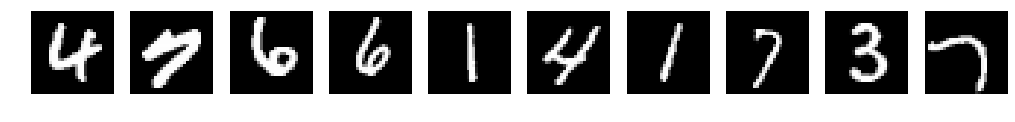

In [37]:
def plot_image(image_id, dataset=X_train, im_size=28):
    pylab.imshow(255-dataset[image_id,:].reshape(im_size, im_size))
    
def plot_grid(image_ids, nrows, ncols, dataset=X_train, im_size=28):
    fig = pyplot.gcf()
    fig.set_size_inches(17.5,15.5)
    for pylab_index, example_id in enumerate(image_ids):
        pylab.subplot(nrows, ncols, pylab_index + 1)
        plot_image(example_id, dataset, im_size)
        pylab.axis('off')
plot_grid(range(10), nrows=1, ncols=10)

In [11]:
def get_neighbors(example_img, X_minus_example, Y_minus_example, estimator):
    distances, indices = estimator.kneighbors(example_img, n_neighbors=10)
    distances, indices = distances[0], indices[0]
    
    df = pd.DataFrame()
    df['distances'], df['indices']  = distances, indices
    df['labels'] = Y_minus_example[indices]
    
    return df

In [73]:
# data
X_train, Y_train = X_train[:2000], Y_train[:2000]
X_test, Y_test = X_test[:2000], Y_test[:2000]

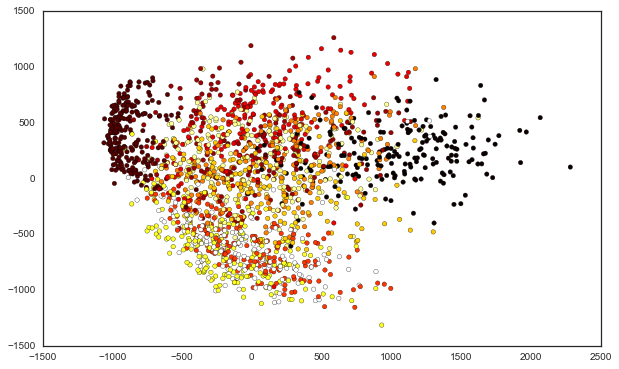

In [41]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
plt.figure(figsize=(10, 6))
pylab.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap=cm.hot)

In [38]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=200)

X_tsne = tsne.fit_transform(np.concatenate((X_train, X_test)))
X_train_tsne, X_test_tsne = X_tsne[:len(X_train)], X_tsne[len(X_train):]
plt.figure(figsize=(10, 6))

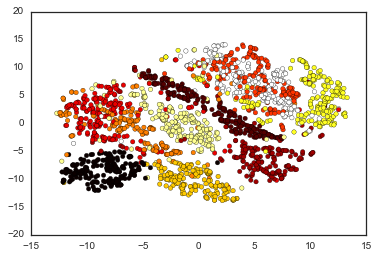

In [43]:
pylab.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=Y_train, cmap=cm.hot)

In [44]:
# KNN_PCA2d vs KNN_TSNE2d

knn_pca = KNeighborsClassifier().fit(X_train_pca, Y_train)
y_pca = knn_pca.predict(X_test_pca)
print 'knn pca accuracy_score = %s' % accuracy_score(y_pca, Y_test)

knn pca accuracy_score = 0.4115


In [45]:
knn_tsne = KNeighborsClassifier().fit(X_train_tsne, Y_train)
y_tsne = knn_tsne.predict(X_test_tsne)
print 'knn tsne accuracy_score = %s' % accuracy_score(y_tsne, Y_test)

knn tsne accuracy_score = 0.8685


<h1 align="center">Conclusion</h1>  

**PRO PCA**:
 
 * PCA помогает избавиться от "лишних" размерностей
 * PCA строит оптимальное линейное преобразование
 * PCA применим для больших размерностей
 * существуют ядерные вариант PCA (KernelPCA)

**Cons PCA**
 * если требуется сложное нелинейное преобразование, PCA не работает
 * не подходит для визуализации на двухмерной плоскости при большой размерности исходных пространств

**PRO tSNE**:
 * отлично визуализируют (2D, 3D) данные
 * испольюзуются для предобрабтки данных, анализа структуры данных
       
**Cons tSNE**
  * стохастичность (PCA детерминирован)
  * неинтерпретируемость данных
  * не применим (сложно применим) для новых данных
  * не даёт ответ об оптимальной размерности пространства

## HW8
See at lecture
  
## Reference
- ESL https://web.stanford.edu/~hastie/local.ftp/Springer/OLD/ESLII_print4.pdf
- TSNE http://www.youtube.com/watch?v=RJVL80Gg3lA
- http://distill.pub/2016/misread-tsne/

## Обратная связь 
  ** оцените <a href="https://docs.google.com/forms/d/e/1FAIpQLSdmyY3f-lwrhSGeqJPaxcXrdj0SfZzZbgRIggg-nx4EQ_eQLQ/viewform?c=0&w=1"> семинар </a> **
  
  ** оставьте <a href="https://docs.google.com/forms/d/e/1FAIpQLSdefy8neFtoxDlXD3toHi3fWB3OW-23APTRj-GuTX8wtAJahQ/viewform?c=0&w=1"> отзыв </a> о лекции **